Mean Squared Error: 6.62


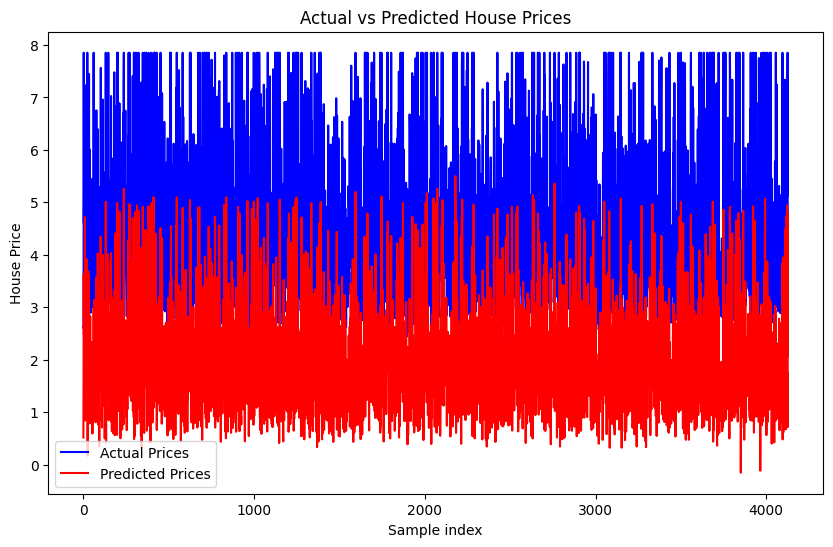

In [5]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Train the SVR model with RBF kernel
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Predict the house prices on the test set
y_pred = model.predict(X_test)

# Inverse transform the predicted and actual values to their original scale
y_pred_inverse = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_inverse = scaler_y.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
print(f"Mean Squared Error: {mse:.2f}")

# Plot the actual vs predicted house prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_inverse, label='Actual Prices', color='b')
plt.plot(y_pred_inverse, label='Predicted Prices', color='r')
plt.legend()
plt.xlabel('Sample index')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Prices')
plt.show()
